question a

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[3, 2, 0, -1], [-1, 3, 0, 2], [0, -4, -2, 7]])
b = np.array([[3], [1], [-4]])

In [3]:
def gradient_descent(x0, α, γ, tol=1e-3, max_iters=10000):
    x = x0.copy()
    history = [(0, x.copy())]              
    for k in range(1, max_iters+1):
        g = df(x, γ)
        if np.linalg.norm(g) < tol:
            break
        x = x - α * g
        history.append((k, x.copy()))
    return history

def df(x, y):
    return A.T @ (A @ x - b) + y * x

In [4]:
a = 0.01
y = 2
x = np.array([[1], [1], [1], [1]])

In [5]:
h = gradient_descent(x, a, y)

# print first 5
print("First 5 iterates:")
for k, xk in h[:5]:
    print(f"k={k}, x={np.round(xk, 4)}")

# print last 5
print("\nLast 5 iterates:")
for k, xk in h[-5:]:
    print(f"k={k}, x={np.round(xk, 4)}")

print(f"\nConverged in {h[-1][0]} iterations; "
      f"‖∇f‖≈{np.linalg.norm(df(h[-1][1], y)):.4e}")

First 5 iterates:
k=0, x=[[1]
 [1]
 [1]
 [1]]
k=1, x=[[0.98]
 [1.07]
 [1.08]
 [0.58]]
k=2, x=[[0.9393]
 [1.0117]
 [1.0908]
 [0.4222]]
k=3, x=[[0.8973]
 [0.934 ]
 [1.0835]
 [0.3383]]
k=4, x=[[0.8586]
 [0.862 ]
 [1.0712]
 [0.2795]]

Last 5 iterates:
k=383, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=384, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=385, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=386, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=387, x=[[ 0.4301]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]

Converged in 387 iterations; ‖∇f‖≈9.8030e-04


question b

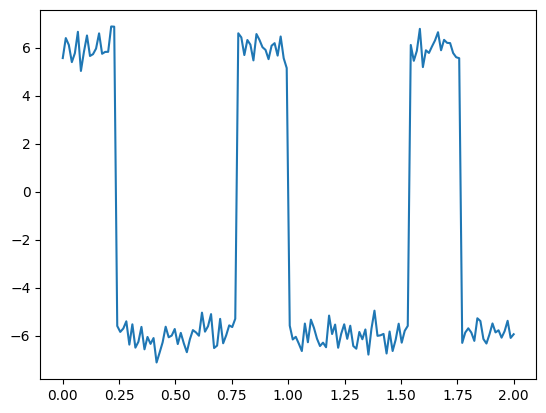

In [6]:
t_var = np.load("t_var.npy")
y_var = np.load("y_var.npy")
plt.plot(t_var, y_var)
plt.show()

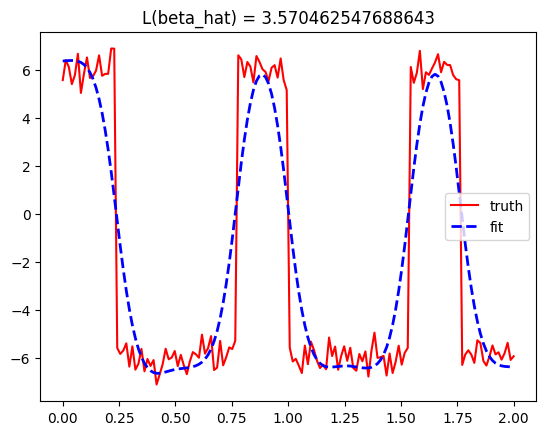

In [ ]:
p = len(y_var)

def create_W(p):
    W = np.zeros((p-2, p))
    b = np.array([1,-2,1])
    for i in range(p-2):
        W[i,i:i+3] = b
    return W

def loss(beta, y, W, lam):
    term1 = (1/(2*p)) * np.linalg.norm(y - beta)**2
    term2 = lam * np.linalg.norm(W @ beta)**2
    loss_val = term1 + term2
    return loss_val

lam = 0.9
W = create_W(p)
I = np.eye(p)

beta_hat = np.linalg.solve(I + 2*lam*p*(W.T @ W), y_var)

Lval = loss(beta_hat, y_var, W, lam)

plt.plot(t_var, y_var, zorder=1, color='red', label='truth')
plt.plot(t_var, beta_hat, zorder=3, color='blue',
linewidth=2, linestyle='--', label='fit')
plt.legend(loc='best')
plt.title(f"L(beta_hat) = {loss(beta_hat, y_var, W, lam)}")
plt.show()

question e

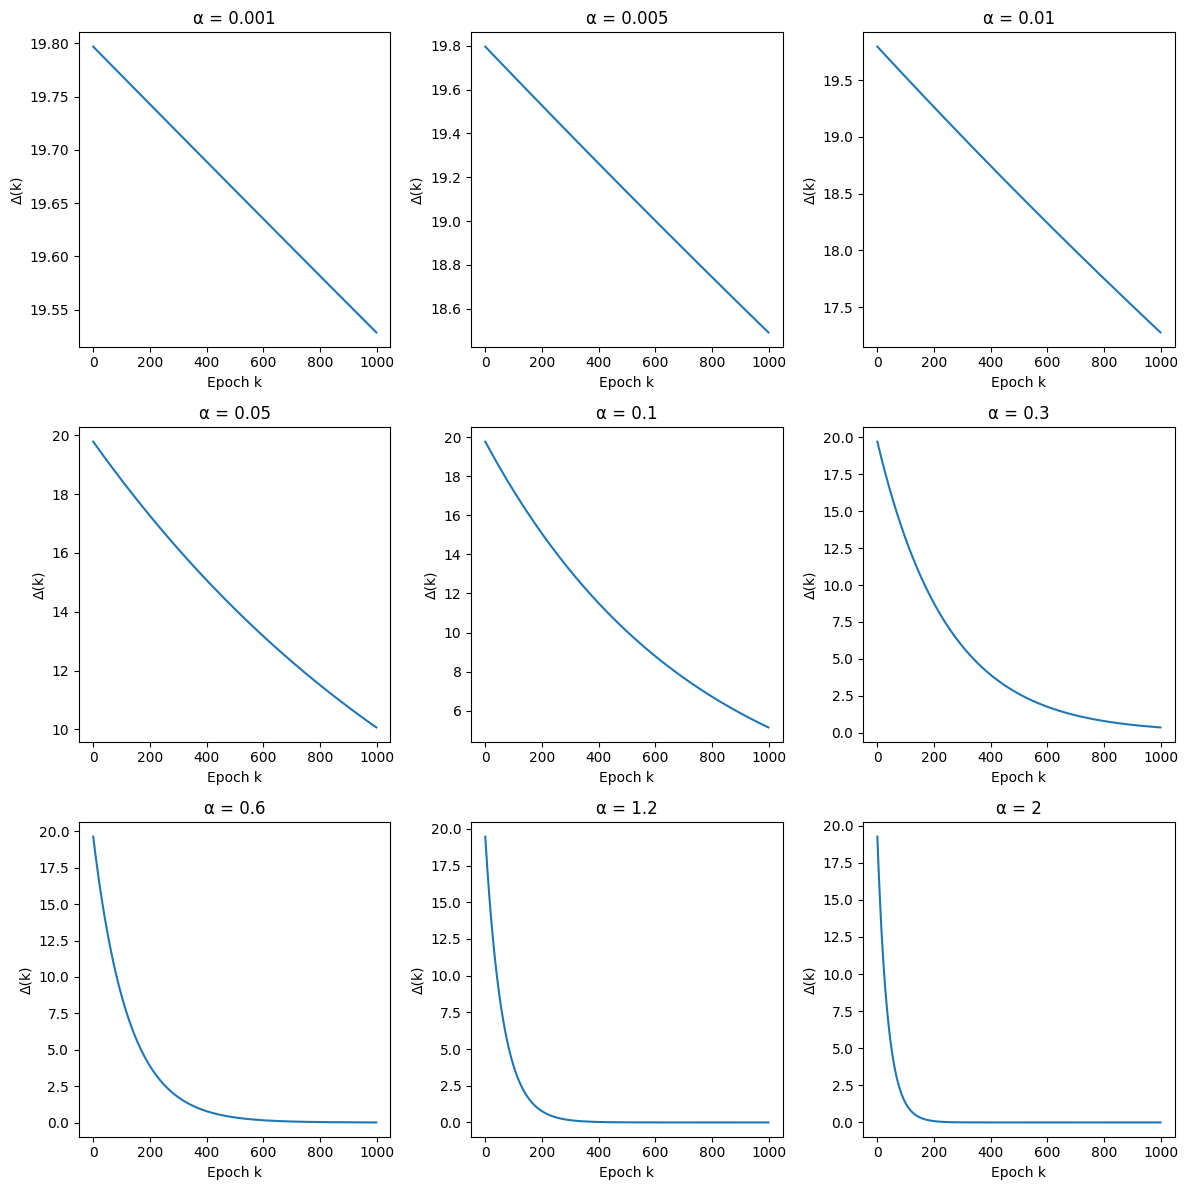

In [8]:
lam = 0.001
beta_hat = np.linalg.solve(np.eye(p) + 2*lam*p*(W.T @ W), y_var)

def loss(beta):
    return 1/(2*p)*np.linalg.norm(y_var - beta)**2 + lam * np.linalg.norm(W @ beta)**2

def grad(beta):
    return (beta - y_var)/p + 2*lam*(W.T @ (W @ beta))

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.6, 1.2, 2]

deltas = []
for alpha in alphas:
    beta = np.ones(p)
    delta_k = []
    for k in range(1, 1001):
        beta = beta - alpha * grad(beta)
        delta_k.append(loss(beta) - loss(beta_hat))
    deltas.append(delta_k)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, ax in enumerate(axes.flatten()):
    ax.plot(deltas[idx])
    ax.set_title(f'α = {alphas[idx]}')
    ax.set_xlabel('Epoch k')
    ax.set_ylabel('Δ(k)')
plt.tight_layout()
plt.show()


based on the plots, alpha = 2 is the best.

question f

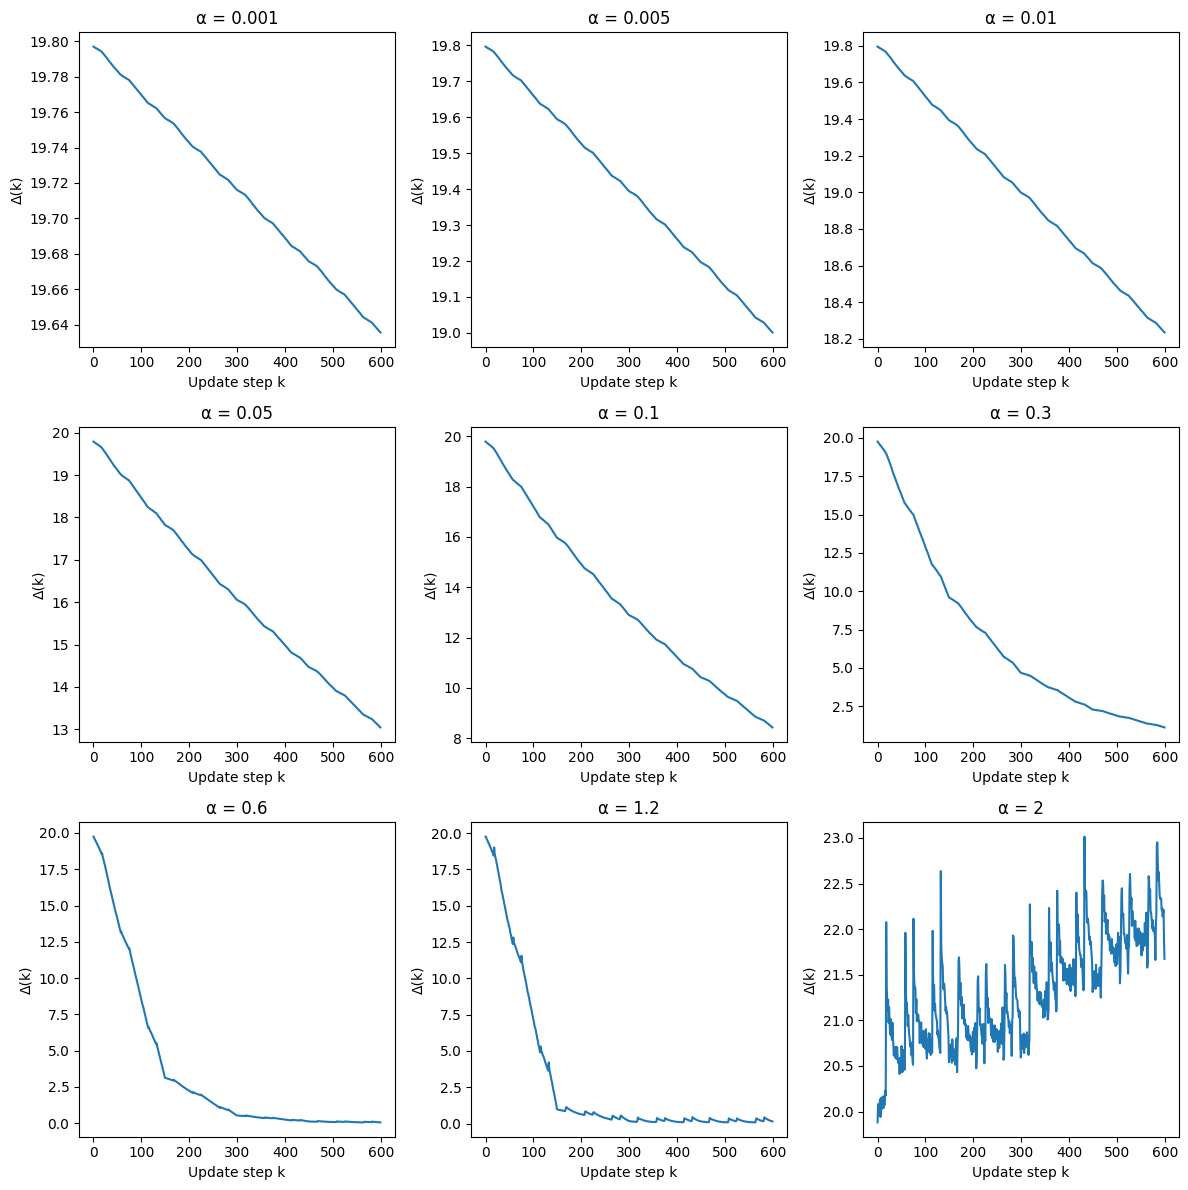

In [9]:
def grad_j(beta, j):
    g = np.zeros_like(beta)
    g[j] = -(y_var[j] - beta[j])
    g += 2*lam*(W.T @ (W @ beta))
    return g

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.6, 1.2, 2]
deltas_sgd = []

for alpha in alphas:
    beta = np.ones(p)
    delta_history = []
    total_updates = 4 * p
    for k in range(total_updates):
        j = k % p
        g = grad_j(beta, j)
        beta = beta - alpha * g
        delta_history.append(loss(beta) - loss(beta_hat))
    deltas_sgd.append(delta_history)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, ax in enumerate(axes.flatten()):
    ax.plot(deltas_sgd[idx])
    ax.set_title(f'α = {alphas[idx]}')
    ax.set_xlabel('Update step k')
    ax.set_ylabel('Δ(k)')
plt.tight_layout()
plt.show()

best is alpha = 1.2. SGD only uses one data point's gradient, so sometimes that estimate will make delta k go up. 

question h

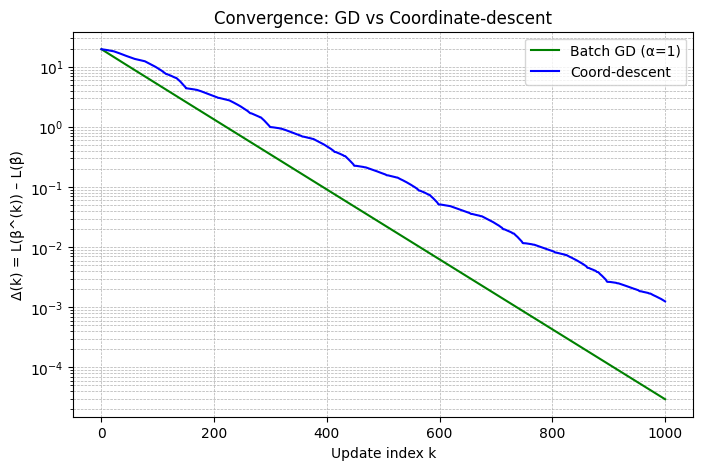

In [10]:
M = W.T @ W

alpha = 1.0
beta_gd = np.ones(p)
delta_gd = [loss(beta_gd) - loss(beta_hat)]

for epoch in range(1, 1001):
    beta_gd = beta_gd - alpha * grad(beta_gd)
    delta_gd.append(loss(beta_gd) - loss(beta_hat))

beta_cd = np.ones(p)
delta_cd = [loss(beta_cd) - loss(beta_hat)]

for k in range(1, 1001):
    j = (k-1) % p
    row = M[j]
    numer = y_var[j]/p - 2*lam*(row @ beta_cd - row[j]*beta_cd[j])
    denom = 1/p + 2*lam*row[j]
    beta_cd[j] = numer/denom
    delta_cd.append(loss(beta_cd) - loss(beta_hat))

plt.figure(figsize=(8,5))
plt.plot(delta_gd, label="Batch GD (α=1)",  color="green")
plt.plot(delta_cd, label="Coord-descent", color="blue")
plt.xlabel("Update index k")
plt.ylabel("Δ(k) = L(β^(k)) – L(β̂)")
plt.title("Convergence: GD vs Coordinate-descent")
plt.legend()
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

In [ ]:
question i

if you can afford to do GD (O(p^2) cost), then it will be faster. coordinate descent costs O(p) so with larger p, it would be better than GD.